Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1034 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/beans/0.1.0.incomplete07A87W/beans-train.tfrecord*...:   0%|          | 0/…

Generating validation examples...:   0%|          | 0/133 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/beans/0.1.0.incomplete07A87W/beans-validation.tfrecord*...:   0%|         …

Generating test examples...:   0%|          | 0/128 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/beans/0.1.0.incomplete07A87W/beans-test.tfrecord*...:   0%|          | 0/1…

Dataset beans downloaded and prepared to /root/tensorflow_datasets/beans/0.1.0. Subsequent calls will reuse this data.
Number of Classes: 3
Class Names: ['angular_leaf_spot', 'bean_rust', 'healthy']
Number of Training Examples: 1034
Number of Testing Examples: 128
Epoch 1/10
33/33 [==============================] - 137s 4s/step - loss: 1.3271 - accuracy: 0.4188 - val_loss: 1.0427 - val_accuracy: 0.4141
Epoch 2/10
33/33 [==============================] - 116s 3s/step - loss: 0.9147 - accuracy: 0.5619 - val_loss: 0.7510 - val_accuracy: 0.6484
Epoch 3/10
33/33 [==============================] - 112s 3s/step - loss: 0.8166 - accuracy: 0.6567 - val_loss: 0.6817 - val_accuracy: 0.7188
Epoch 4/10
33/33 [==============================] - 112s 3s/step - loss: 0.6795 - accuracy: 0.7118 - val_loss: 0.6453 - val_accuracy: 0.7578
Epoch 5/10
33/33 [==============================] - 120s 4s/step - loss: 0.6305 - accuracy: 0.7437 - val_loss: 0.6263 - val_accuracy: 0.7578
Epoch 6/10
33/33 [============

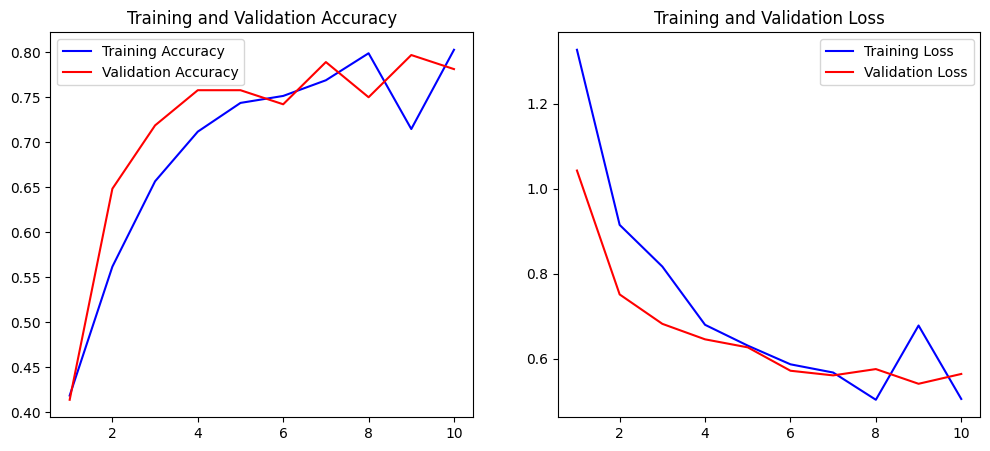

In [20]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Step 1: Load and Explore the Dataset
beans_dataset, beans_info = tfds.load('beans', split=['train', 'test'], as_supervised=True, with_info=True)
num_classes = beans_info.features['label'].num_classes
class_names = beans_info.features['label'].names

# Display dataset information
print("Number of Classes:", num_classes)
print("Class Names:", class_names)
print("Number of Training Examples:", len(beans_dataset[0]))
print("Number of Testing Examples:", len(beans_dataset[1]))

# Step 2: Data Preprocessing
def preprocess_image(image, label):
    # Resize image to 224x224
    image = tf.image.resize(image, (224, 224))
    # Normalize pixel values to [0, 1]
    image = image / 255.0
    return image, label

# Apply preprocessing function to training and testing datasets
batch_size = 32
train_dataset = beans_dataset[0].map(preprocess_image).shuffle(1000).batch(batch_size)
test_dataset = beans_dataset[1].map(preprocess_image).batch(batch_size)

# Step 3: Build the Deep Neural Network (DNN) Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 4: Train the Model
num_epochs = 10
history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

# Step 5: Evaluate the Model
test_loss, test_acc = model.evaluate(test_dataset)
print("Test Accuracy:", test_acc)

# Step 6: Results Visualization
# Plot training accuracy and loss curves
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

plot_history(history)
